### Importación de datos



In [2]:
import pandas as pd

In [3]:


url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [5]:
ingresos_totales = []
for i in (tienda1, tienda2, tienda3, tienda4):
    ingresos_totales.append(sum(i["Precio"]))

print(ingresos_totales)
print(f'La tienda qué más vendió fue la número {ingresos_totales.index(max(ingresos_totales))+1} ')


[1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]
La tienda qué más vendió fue la número 1 


In [6]:
!pip install matplotlib==3.8.1

In [7]:
import matplotlib.pyplot as plt

In [8]:
tiendas = ['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4']

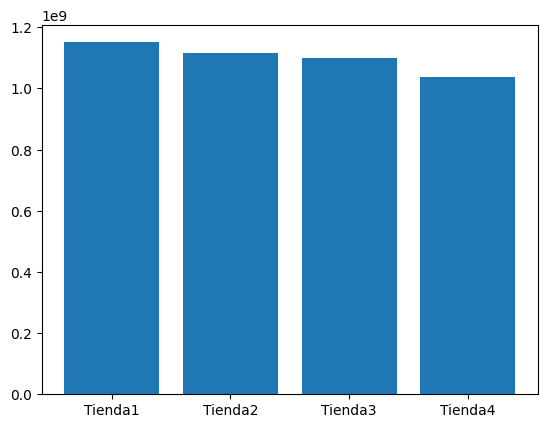

In [9]:
plt.bar(x = tiendas, height = ingresos_totales)
plt.show()

In [10]:
datos = [{'nombre': 'Tienda1'}, {'nombre': 'Tienda2'}, {'nombre': 'Tienda3'}, {'nombre': 'Tienda4'}]
for i in range(4):
    datos[i]['ingresos totales']=ingresos_totales[i]
    datos[i]['categorias']={}
datos


[{'nombre': 'Tienda1', 'ingresos totales': 1150880400.0, 'categorias': {}},
 {'nombre': 'Tienda2', 'ingresos totales': 1116343500.0, 'categorias': {}},
 {'nombre': 'Tienda3', 'ingresos totales': 1098019600.0, 'categorias': {}},
 {'nombre': 'Tienda4', 'ingresos totales': 1038375700.0, 'categorias': {}}]

# 2. Ventas por categoría

In [ ]:
d = 0
for i in (tienda1,tienda2,tienda3,tienda4):
  for j in list(i['Categoría del Producto'].items()):
    if j[1] in datos[d]['categorias']:
      datos[d]['categorias'][j[1]] += 1
    else:
      datos[d]['categorias'][j[1]] = 1
  #para ordenar alfabéticamente las categorías
  datos[d]['categorias'] = dict(sorted(datos[d]['categorias'].items()))
  d+=1

datos  

[{'nombre': 'Tienda1',
  'ingresos totales': 1150880400.0,
  'categorias': {'Artículos para el hogar': 513,
   'Deportes y diversión': 852,
   'Electrodomésticos': 936,
   'Electrónicos': 1344,
   'Instrumentos musicales': 546,
   'Juguetes': 972,
   'Libros': 519,
   'Muebles': 1395}},
 {'nombre': 'Tienda2',
  'ingresos totales': 1116343500.0,
  'categorias': {'Artículos para el hogar': 543,
   'Deportes y diversión': 825,
   'Electrodomésticos': 915,
   'Electrónicos': 1266,
   'Instrumentos musicales': 672,
   'Juguetes': 939,
   'Libros': 591,
   'Muebles': 1326}},
 {'nombre': 'Tienda3',
  'ingresos totales': 1098019600.0,
  'categorias': {'Artículos para el hogar': 531,
   'Deportes y diversión': 831,
   'Electrodomésticos': 834,
   'Electrónicos': 1353,
   'Instrumentos musicales': 531,
   'Juguetes': 945,
   'Libros': 555,
   'Muebles': 1497}},
 {'nombre': 'Tienda4',
  'ingresos totales': 1038375700.0,
  'categorias': {'Artículos para el hogar': 603,
   'Deportes y diversión': 8

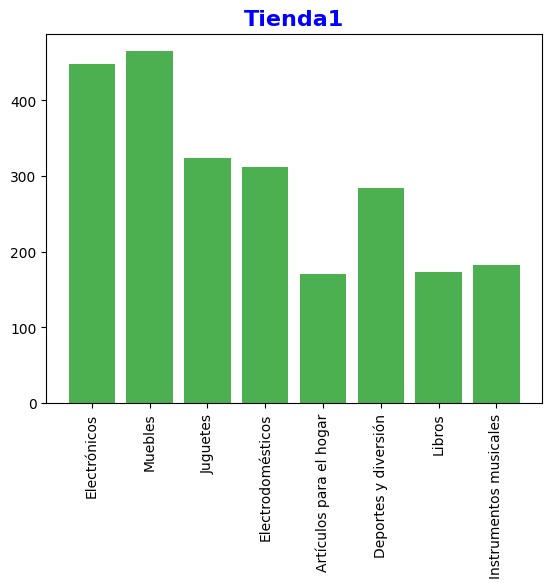

In [ ]:
valores = []
for i in datos[0]['categorias']:
    valores.append(datos[0]['categorias'][i])
plt.bar(x = list(datos[0]['categorias']), height = valores, color = "#4CAF50")
plt.xticks(rotation=90)
plt.title("Tienda1", fontsize=16, fontweight="bold", color="blue")
plt.show()

In [ ]:
def mostrarDatosCategorias(ntienda, colbar):
    valores = []
    for i in datos[ntienda-1]['categorias']:
        valores.append(datos[ntienda-1]['categorias'][i])
    plt.bar(x = list(datos[ntienda-1]['categorias']), height = valores, color = colbar)
    plt.xticks(rotation=90)
    plt.title(f"Tienda{ntienda}", fontsize=16, fontweight="bold", color='black')
    plt.show()

In [ ]:
print("\t")

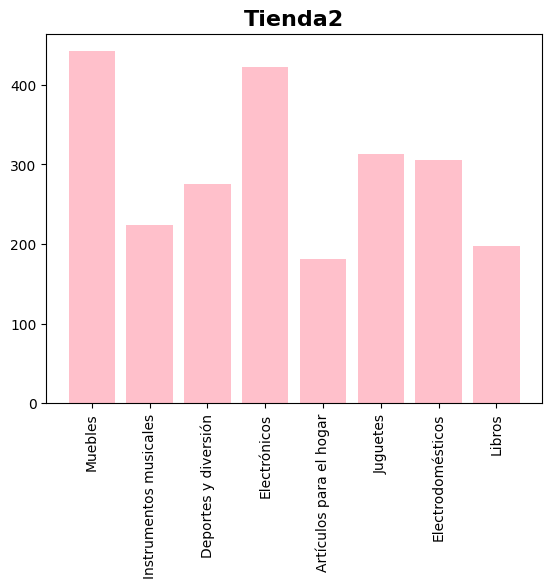

In [ ]:
mostrarDatosCategorias(2, 'pink')

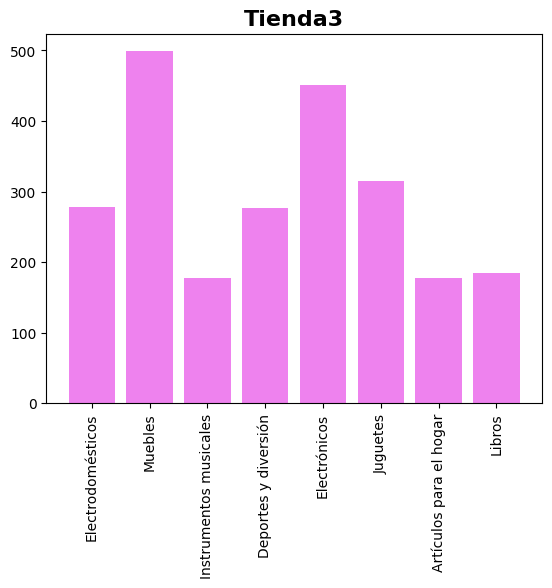

In [ ]:
mostrarDatosCategorias(3, 'violet')

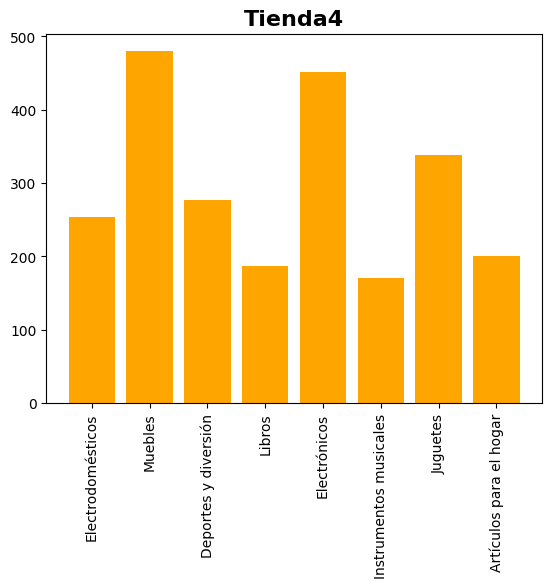

In [ ]:
mostrarDatosCategorias(4,'orange')

In [31]:
print(f"{'Categoría':<30} | {'Tienda1'.center(10)} | {'Tienda2'.center(10)} | {'Tienda3'.center(10)} | {'Tienda4'.center(10)}")
for categoria in datos[0]['categorias']:
    print(f"{categoria:<30} | {str(datos[0]['categorias'][categoria]).center(10)} | {str(datos[1]['categorias'][categoria]).center(10)} | {str(datos[2]['categorias'][categoria]).center(10)} | {str(datos[3]['categorias'][categoria]).center(10)}")

Categoría                      |  Tienda1   |  Tienda2   |  Tienda3   |  Tienda4  
Artículos para el hogar        |    513     |    543     |    531     |    603    
Deportes y diversión           |    852     |    825     |    831     |    831    
Electrodomésticos              |    936     |    915     |    834     |    762    
Electrónicos                   |    1344    |    1266    |    1353    |    1353   
Instrumentos musicales         |    546     |    672     |    531     |    510    
Juguetes                       |    972     |    939     |    945     |    1014   
Libros                         |    519     |    591     |    555     |    561    
Muebles                        |    1395    |    1326    |    1497    |    1440   


# 3. Calificación promedio de la tienda


In [35]:
def calificacionMedia (tienda, ntienda):
    media = sum(list(tienda['Calificación']))/len(list(tienda['Calificación']))
    datos[ntienda-1]['Calificación Media'] = media
    return media


In [36]:
calificacionMedia(tienda1,1)
calificacionMedia(tienda2,2)
calificacionMedia(tienda3,3)
calificacionMedia(tienda4,4)

3.9957591178965224

# 4. Productos más y menos vendidos

In [39]:
print(datos[0]['Calificación Media'], datos[1]['Calificación Media'], datos[2]['Calificación Media'], datos[3]['Calificación Media'])

3.976685036032217 4.037303942348453 4.048325561678677 3.9957591178965224


# 5. Envío promedio por tienda

In [37]:
tienda1.head(len(tienda1))

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111
